<img src="credits3.png" style="width:95%;">

<h1 style="color:#0e535b; text-align: left">Banco Uno - Data Analisys</h1>

<p style="text-align:justify">En este notebook se realizarán labores de Análisis de Datos del caso cuyo propósito final será intentar predecir la probabilidad de cumplimiento de pago de los clientes que tienen un crédito en el Banco Uno.</p>

<h3 style="color:#0e535b; text-align: left">1. Trabajando con datos no numéricos</h3>

<h4 style="color:#0e535b; text-align: left">1.1 Carga de Liberías</h4>

<p style="text-align:justify">Se utilizarán librerías que permiten analizar los datos (pandas) y generar informe graficos y visualización de los datos.</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
credit = pd.read_excel("credit.xlsx")
credit.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,1,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,2,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,3,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,4,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h4 style="color:#0e535b; text-align: left">1.2 Generación de las variables dummies:</h4>

<p style="text-align:justify">Primeramente, se debe proceder a consultar el tipo de variables disponibles en el DataFrame, posteriormente se realiza la generación de las variables dummies que permiten graficar valores categóricos.</p>


In [4]:
credit.dtypes

LIMIT_BAL                          int64
SEX                               object
EDUCATION                         object
MARRIAGE                           int64
AGE                                int64
PAY_0                              int64
PAY_2                              int64
PAY_3                              int64
PAY_4                              int64
PAY_5                              int64
PAY_6                              int64
BILL_AMT1                          int64
BILL_AMT2                          int64
BILL_AMT3                          int64
BILL_AMT4                          int64
BILL_AMT5                          int64
BILL_AMT6                          int64
PAY_AMT1                           int64
PAY_AMT2                           int64
PAY_AMT3                           int64
PAY_AMT4                           int64
PAY_AMT5                           int64
PAY_AMT6                           int64
default payment next month (Y)    object
dtype: object

In [5]:
credit = pd.get_dummies(credit)
credit.dtypes

LIMIT_BAL                                     int64
MARRIAGE                                      int64
AGE                                           int64
PAY_0                                         int64
PAY_2                                         int64
PAY_3                                         int64
PAY_4                                         int64
PAY_5                                         int64
PAY_6                                         int64
BILL_AMT1                                     int64
BILL_AMT2                                     int64
BILL_AMT3                                     int64
BILL_AMT4                                     int64
BILL_AMT5                                     int64
BILL_AMT6                                     int64
PAY_AMT1                                      int64
PAY_AMT2                                      int64
PAY_AMT3                                      int64
PAY_AMT4                                      int64
PAY_AMT5    

<h3 style="color:#0e535b; text-align: left">2. Analizando los datos</h3>

In [6]:
credit.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month (Y)_default,default payment next month (Y)_not default
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,4984.977880,5149.928631,0.577629,0.422371,0.379382,0.163606,0.007513,0.449499,0.216611,0.783389
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,16896.223773,20076.659470,0.494040,0.494040,0.485335,0.369995,0.086367,0.497547,0.412021,0.412021
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,247.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,1500.000000,1328.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,4000.000000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,332000.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4 style="color:#0e535b; text-align: left">2.1 Visualización de los Datos</h4>

<p style="text-align:justify">A continuación se procederá a realizar preguntas que permitan analizar los datos generando una visualización grafica de tal forma que nos lleven a una respuesta.</p>

<ol>
    <li>¿Cuál es el grupo etario que tiene mayor cantidad de créditos?</li>
    <li>¿Cuál es el grupo etario que ha tomado mayor cantidad de dinero prestado en Unidades Monetarias?</li>
    <li>¿Cuál es la cantidad de créditos que se encuentran atrasados?</li>
    <li>¿Cuál es la relación entre el estado del préstamo y la cantidad del préstamo?</li>
</ol>

<h5 style="color:#0e535b; text-align: left">2.1.1 ¿Cuál es el grupo etario que tiene mayor cantidad de créditos?</h5>

Debido a que los rangos de edad varían entre 21 y 75 años, se crearán tres grupos etarios (bins):
* Personas entre 21 y 39 años - Adulto temprano
* Personas entre 40 y 57 años - Adultos medio
* Personas entre 58 y 75 años - Adulto mayor

In [7]:
#Remove all axis
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [8]:
bins = np.linspace(21,75,4)
bins

array([21., 39., 57., 75.])

In [9]:
categorias = ["Adulto temprano", "Adulto Medio", "Adulto Mayor"]
credit["AGE(cat)"] = pd.cut(credit["AGE"], bins, labels=categorias, include_lowest=True)
dfTemp = credit[["AGE","AGE(cat)"]]
dfTemp.head(5)

,AGE,AGE(cat)
0,24,Adulto temprano
1,26,Adulto temprano
2,34,Adulto temprano
3,37,Adulto temprano
4,57,Adulto Medio


In [10]:
gf = credit.groupby(['AGE(cat)']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('AGE(cat)', ascending = False)
gf

,LIMIT_BAL
AGE(cat),
Adulto Mayor,45
Adulto Medio,672
Adulto temprano,1679


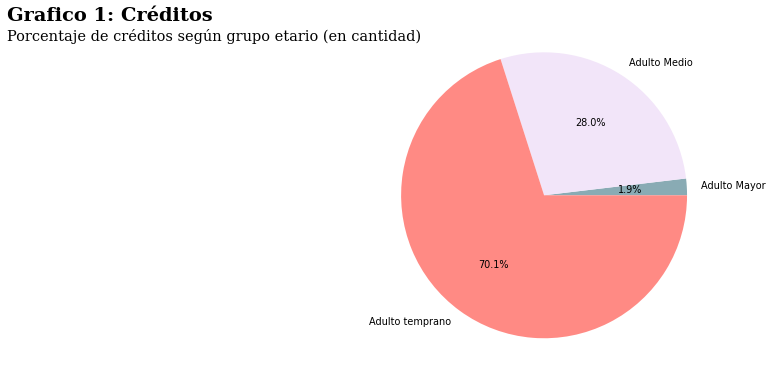

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=70)

eje_x = gf.index.tolist()
data = gf['LIMIT_BAL'].tolist()

bar_colors = ['#89abb4', '#f2e5f9', '#ff8a84']
ax.pie(data, labels=eje_x,colors=bar_colors, autopct='%1.1f%%')

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 1: Créditos"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Porcentaje de créditos según grupo etario (en cantidad)"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.85)
plt.show()

<h5 style="color:#0e535b; text-align: left">2.1.2 ¿Cuál es el grupo etario que ha tomado mayor cantidad de dinero prestado en Unidades Monetarias?</h5>

<p style="text-align:justify">Se mantendrán los mismos grupos etarios que en el ejemplo anterior.</p>

In [12]:
dfTemp = credit[["AGE","AGE(cat)","LIMIT_BAL"]]
dfTemp.head(5)

,AGE,AGE(cat),LIMIT_BAL
0,24,Adulto temprano,20000
1,26,Adulto temprano,120000
2,34,Adulto temprano,90000
3,37,Adulto temprano,50000
4,57,Adulto Medio,50000


In [13]:
gf = credit.groupby(['AGE(cat)']).sum()
gf = gf.iloc[:,:1]
gf = gf.sort_values('AGE(cat)', ascending = False)
gf

,LIMIT_BAL
AGE(cat),
Adulto Mayor,8430000
Adulto Medio,119410000
Adulto temprano,269500000


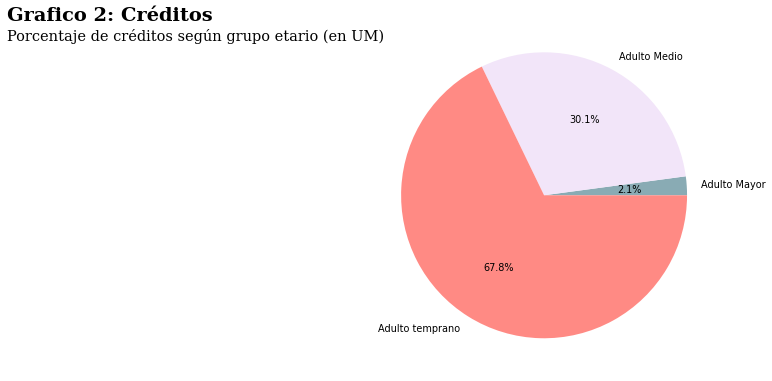

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=70)

eje_x = gf.index.tolist()
data = gf['LIMIT_BAL'].tolist()

bar_colors = ['#89abb4', '#f2e5f9', '#ff8a84']
ax.pie(data, labels=eje_x,colors=bar_colors, autopct='%1.1f%%')

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 2: Créditos"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Porcentaje de créditos según grupo etario (en UM)"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.85)
plt.show()

<h5 style="color:#0e535b; text-align: left">2.1.3 ¿Cuál es la cantidad de préstamos que se encuentran atrasados?</h5>

<p style="text-align:justify">Al mes de setiembre de 2005, última fecha de actualización de los datos, los créditos con pagos atrasados tienen un número positivo y diferente de 0 en la columna de PAY_0, los demás son préstamos al día o pagados completamente. </p>

In [15]:
categorias = ["Préstamo Al día", "Atrasado 1m", "Atrasado 2m", "Atrasado 3m", "Atrasado 4m", "Atrasado 5m", "Atrasado 6m", "Atrasado 7m", "Atrasado 8m"]
credit["PAY_0(cat)"] = pd.cut(credit["PAY_0"], [-8.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.], labels=categorias, include_lowest=True)
dfTemp = credit[["PAY_0","PAY_0(cat)"]]


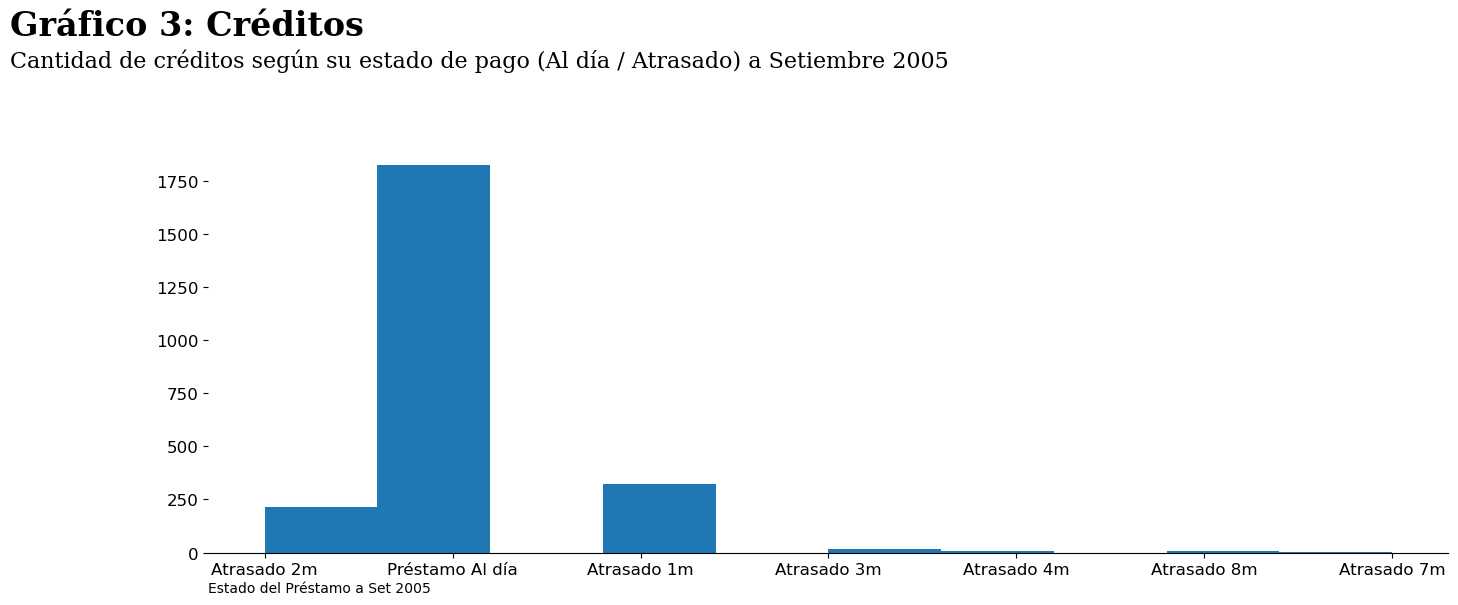

In [16]:
fig,ax=plt.subplots(1,1,figsize=(16,6.9),dpi=100)

plt.hist(dfTemp["PAY_0(cat)"])

#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Gráfico 3: Créditos clasificados por estado"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Cantidad de créditos según su estado de pago (Al día / Atrasado) a Setiembre 2005'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")

#-------Etiquetas en Eje X y Y
label = "Estado del Préstamo a Set 2005"
ax.set_xlabel(label,
             ha="left",
             fontsize=10,
             fontweight="regular",
             fontfamily="sans")

ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

ax.tick_params(axis='both',
               labelsize=12)

plt.subplots_adjust(top=0.70)

plt.show()

<h5 style="color:#0e535b; text-align: left">2.1.4 ¿Cuál es la relación entre el estado del crédito y la cantidad monetaria del crédito?</h5>

<p style="text-align:justify">Con base en la información anterior al mes de setiembre de 2005, se establecerá la relación entre el estado del los créditos y su monto en Unidades Monetarias</p>

In [17]:
dfTemp = credit[["PAY_0","PAY_0(cat)","LIMIT_BAL"]]

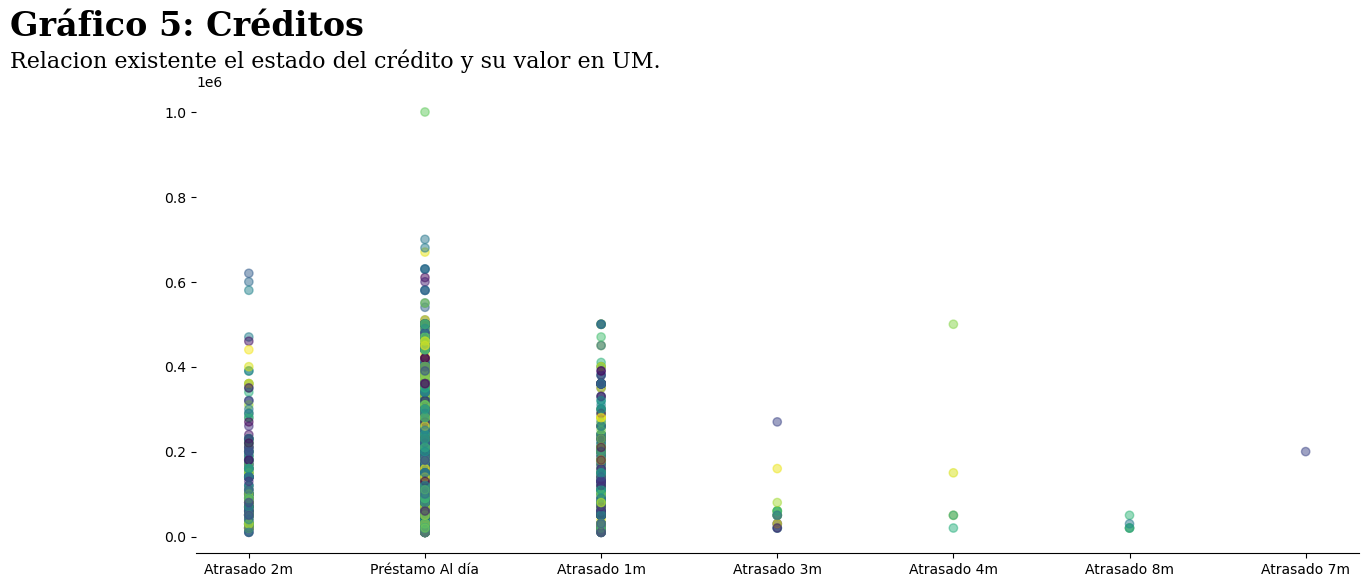

In [18]:
fig,ax=plt.subplots(1,1,figsize=(15,6.9),dpi=100)

colors = np.random.rand(2396)
ax.scatter(dfTemp['PAY_0(cat)'],credit['LIMIT_BAL'],  c=colors, alpha=0.5)

#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Gráfico 5: Créditos clasificados por estado del pago"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Relacion existente el estado del crédito y su valor en UM.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


plt.subplots_adjust(top=0.78)

plt.show()

<h4 style="color:#0e535b; text-align: left">2.2 Visualización de los Datos - Resultados </h4>

<p style="text-align:justify">A continuación se procederá a remarcar los resultados obtenidos del análisis por medio de  visualización gráfica.</p>

<ol>
    <li>¿Cuál es el grupo etario que tiene mayor cantidad de créditos? R/ El grupo Adulto temprano tiene mas préstamos qie los otros dos grupos etarios juntos</li>
    <li>¿Cuál es el grupo etario que ha tomado mayor cantidad de dinero prestado en Unidades Monetarias? R/ En Unidades Monetarias, el grupo adulto temprano sigue siendo el que tiene mayor representación, sin embargo la diferencia es ligeramente menor</li>
    <li>¿Cuál es la cantidad de créditos que se encuentran atrasados? R/ La mayoría de los préstamos se encuentran al día y la tendencia parece indicar que las categorías que indican mayor atraso también tienen menos pagos atrasados. </li>
    <li>¿Cuál es la relación entre el estado del préstamo y la cantidad del préstamo? R/ No se ve una relación directa.</li>
</ol>

<h3 style="color:#0e535b; text-align: left">3. Correlación</h3>

In [19]:
corrMat = credit.corr()
print(corrMat)

                                            LIMIT_BAL  MARRIAGE       AGE  \
LIMIT_BAL                                    1.000000 -0.147788  0.154974   
MARRIAGE                                    -0.147788  1.000000 -0.420270   
AGE                                          0.154974 -0.420270  1.000000   
PAY_0                                       -0.200540  0.025893 -0.017835   
PAY_2                                       -0.248233  0.037293 -0.029903   
PAY_3                                       -0.236194  0.038955 -0.037790   
PAY_4                                       -0.224340  0.046826 -0.024571   
PAY_5                                       -0.213442  0.044533 -0.012634   
PAY_6                                       -0.210881  0.041117 -0.009462   
BILL_AMT1                                    0.361823 -0.040450  0.068263   
BILL_AMT2                                    0.361342 -0.037658  0.061591   
BILL_AMT3                                    0.365711 -0.047310  0.065932   

C:\Users\sergi\AppData\Local\Temp\ipykernel_6220\4264262329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat = credit.corr()


<h3 style="color:#0e535b; text-align: left">4. Covarianza</h3>

In [20]:
covMat = credit.cov()
print(covMat)

                                               LIMIT_BAL      MARRIAGE  \
LIMIT_BAL                                   1.676861e+10 -10058.566644   
MARRIAGE                                   -1.005857e+04      0.276248   
AGE                                         1.896911e+05     -2.087939   
PAY_0                                      -2.917502e+04      0.015290   
PAY_2                                      -3.882758e+04      0.023676   
PAY_3                                      -3.815289e+04      0.025540   
PAY_4                                      -3.417397e+04      0.028952   
PAY_5                                      -3.197111e+04      0.027074   
PAY_6                                      -3.227379e+04      0.025541   
BILL_AMT1                                   3.648630e+09  -1655.601465   
BILL_AMT2                                   3.532902e+09  -1494.415030   
BILL_AMT3                                   3.297613e+09  -1731.488883   
BILL_AMT4                             

C:\Users\sergi\AppData\Local\Temp\ipykernel_6220\3199804705.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covMat = credit.cov()
